# 데이터 불러오기

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] =False

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['axes.unicode_minus'] = False

- 2015~2016 시즌의 kbo 타자 경기력 데이터와 비경기적 요소 데이터를 불러온다.

In [345]:
df_1516 = pd.read_excel("/Users/seheemoon/Desktop/아주대학교/2023-2/빅데이터분석/데분_문세희/1516년도 타자 데이터.xlsx")
df_1516.drop('Unnamed: 0',axis=1, inplace=True)
df_1516

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,도루실패,볼넷,데드볼,삼진,병살타,장타율,출루율,실책,OPS,단타
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,3,40,5,58,3,0.325,0.348,15,0.673,67
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,0,8,2,30,5,0.257,0.232,7,0.489,10
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0,0,0,0,0.400,0.200,0,0.600,0
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0,0,1,0,0.000,0.000,0,0.000,0
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,0,0,0,1,0,0.000,0.000,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0,0,0,5,0,0.083,0.083,0,0.166,1
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,10,48,4,122,14,0.521,0.350,16,0.871,86
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,10,49,4,66,10,0.570,0.394,15,0.964,109
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0,0,0,0,0.000,0.000,0,0.000,0


In [346]:
df_add = pd.read_excel("/Users/seheemoon/Desktop/아주대학교/2023-2/빅데이터분석/데분_문세희/야구 데이터 (소은+수연+예영).xlsx")
# df_add.drop('Unnamed: 0',axis=1, inplace=True)
df_add

,이름,fa 여부,국대 여부,좌타우타,올스타 출전 여부
0,강경학,0,0,0,0
1,강구성,0,0,0,0
2,강민국,0,1,1,0
3,강민호,1,1,1,1
4,강승호,0,0,1,0
...,...,...,...,...,...
216,홍창기,0,0,0,0
217,황목치승,0,0,1,0
218,황윤호,0,0,1,0
219,황재균,1,1,1,1


# 데이터 전처리

In [347]:
df_add['좌타우타'].value_counts()

1    136
0     85
Name: 좌타우타, dtype: int64

좌타자 : 0, 우타자 : 1

양타로 기록되어 있는 선수의 경우에는 해당 시즌(2015 ~ 2016)에 활약했던 탸석의 위치를 기준으로 변환, 스위치 히터의 경우인 국해성 선수의 경우 15,16시즌에 기본적으로 좌타석에 서되, 특정 투수에게만 우타석에서 활약했다는 정보를 바탕으로 좌타석으로 대체함.


이후 두 데이터프레임을 이름을 기준으로 합침

In [348]:
# 두 데이터프레임을 이름을 기준으로 합치기
df = pd.merge(df_1516, df_add, on='이름')

# 결과 출력
df

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,병살타,장타율,출루율,실책,OPS,단타,fa 여부,국대 여부,좌타우타,올스타 출전 여부
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,3,0.325,0.348,15,0.673,67,0,0,0,0
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,5,0.257,0.232,7,0.489,10,0,0,0,0
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0.400,0.200,0,0.600,0,0,0,0,0
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0.000,0.000,0,0.000,0,0,0,0,0
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,0,0.000,0.000,0,0.000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0,0.083,0.083,0,0.166,1,0,0,1,0
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,14,0.521,0.350,16,0.871,86,1,1,1,1
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,10,0.570,0.394,15,0.964,109,1,1,1,1
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0.000,0.000,0,0.000,0,0,0,0,0


수비 관련 지표:

수비 관련 지표는 투구나 타격 데이터에 비해 종류도 적고 정확하지도 않은 편이다.

특히 타구의 종류(플라이볼, 라인드라이브)를 기록자가 판단하기에, 기록자의 주관이 들어갈 수 밖에 없다. 

또한 각 수비수의 책임에 대한 것도 이견이 있을 수 있다. 

따라서 아직까지는 수비에 관련한 정통적이고, 세이버매트릭션들이 신뢰할 만한 지표, 스탯은 나오지 않았다.

따라서 본 분석에서는 '실책 개수' 변수를 수비력에 관한 지표로써 활용하였다.

- 결측치 개수 확인

In [350]:
df.isnull().sum()

이름           0
연차           0
연도           0
팀명           0
몸값(만원)       0
타율           0
경기수          0
타수           0
득점           0
2루타          0
3루타          0
홈런           0
루타           0
타점           0
도루           0
도루실패         0
볼넷           0
데드볼          0
삼진           0
병살타          0
장타율          0
출루율          0
실책           0
OPS          0
단타           0
fa 여부        0
국대 여부        0
좌타우타         0
올스타 출전 여부    0
dtype: int64

In [351]:
saber_lst = ['타율', '경기수', '타수', '득점', '2루타', '3루타', '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책', 'OPS', '단타']

- 수치형 변수들의 단위가 제각각 다르기 때문에 Min-Max Scaler을 사용하여 변수들의 단위를 통일해 주었다.

In [352]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['연차', '몸값(만원)', '타율', '경기수', '타수', '득점', '2루타', '3루타', '홈런', '루타', '타점',
       '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '장타율', '출루율', '실책', 'OPS', '단타']
df_numerical = df[numerical_features]
# Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()
# Min-Max 스케일링 적용
scaled_df = scaler.fit_transform(df_numerical)
scaled_df = pd.DataFrame(scaled_df, columns=df_numerical.columns)
scaled_df

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,도루실패,볼넷,데드볼,삼진,병살타,장타율,출루율,실책,OPS,단타
0,0.111111,0.026015,0.257,0.832168,0.517529,0.384615,0.152174,0.307692,0.037736,0.267905,...,0.15,0.370370,0.208333,0.360248,0.136364,0.243811,0.348,0.652174,0.3365,0.385057
1,0.166667,0.024112,0.158,0.314685,0.166945,0.123077,0.065217,0.153846,0.018868,0.068966,...,0.00,0.074074,0.083333,0.186335,0.227273,0.192798,0.232,0.304348,0.2445,0.057471
2,0.055556,0.001904,0.200,0.020979,0.006678,0.000000,0.021739,0.000000,0.000000,0.005305,...,0.00,0.000000,0.000000,0.000000,0.000000,0.300075,0.200,0.000000,0.3000,0.000000
3,0.111111,0.001904,0.000,0.006993,0.003339,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.006211,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
4,0.055556,0.001904,0.000,0.000000,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.006211,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.055556,0.003807,0.083,0.223776,0.018364,0.053846,0.000000,0.000000,0.000000,0.002653,...,0.00,0.000000,0.000000,0.031056,0.000000,0.062266,0.083,0.000000,0.0830,0.005747
364,0.444444,0.302030,0.290,1.000000,0.889816,0.730769,0.891304,0.153846,0.490566,0.737401,...,0.50,0.444444,0.166667,0.757764,0.636364,0.390848,0.350,0.695652,0.4355,0.494253
365,0.500000,0.746193,0.335,0.881119,0.829716,0.746154,0.565217,0.384615,0.509434,0.753316,...,0.50,0.453704,0.166667,0.409938,0.454545,0.427607,0.394,0.652174,0.4820,0.626437
366,0.166667,0.002538,0.000,0.006993,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000


- 수치형 변수들의 scailing을 진행 후, 기존 데이터셋의 범주형 변수들을 추가해 주었다.

In [353]:
categorical_features = ['이름', '팀명', 'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부']
scaled_df[['이름', '팀명', 'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부']] = df[categorical_features]
scaled_df

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,출루율,실책,OPS,단타,이름,팀명,fa 여부,국대 여부,좌타우타,올스타 출전 여부
0,0.111111,0.026015,0.257,0.832168,0.517529,0.384615,0.152174,0.307692,0.037736,0.267905,...,0.348,0.652174,0.3365,0.385057,강경학,한화,0,0,0,0
1,0.166667,0.024112,0.158,0.314685,0.166945,0.123077,0.065217,0.153846,0.018868,0.068966,...,0.232,0.304348,0.2445,0.057471,강경학,한화,0,0,0,0
2,0.055556,0.001904,0.200,0.020979,0.006678,0.000000,0.021739,0.000000,0.000000,0.005305,...,0.200,0.000000,0.3000,0.000000,강구성,NC,0,0,0,0
3,0.111111,0.001904,0.000,0.006993,0.003339,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0000,0.000000,강구성,NC,0,0,0,0
4,0.055556,0.001904,0.000,0.000000,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0000,0.000000,강민국,NC,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.055556,0.003807,0.083,0.223776,0.018364,0.053846,0.000000,0.000000,0.000000,0.002653,...,0.083,0.000000,0.0830,0.005747,황윤호,NC,0,0,1,0
364,0.444444,0.302030,0.290,1.000000,0.889816,0.730769,0.891304,0.153846,0.490566,0.737401,...,0.350,0.695652,0.4355,0.494253,황재균,롯데,1,1,1,1
365,0.500000,0.746193,0.335,0.881119,0.829716,0.746154,0.565217,0.384615,0.509434,0.753316,...,0.394,0.652174,0.4820,0.626437,황재균,롯데,1,1,1,1
366,0.166667,0.002538,0.000,0.006993,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.0000,0.000000,황진수,롯데,0,0,0,0


# 상관분석

- 변수들 간의 상관계수와 p-value 행렬을 출력하기 위한 준비단계

In [354]:
feature_list = list(scaled_df.columns)
features = df.iloc[:]

In [356]:
feature_list.remove('팀명')
feature_list.remove('이름')

In [357]:
features.drop('팀명', axis=1, inplace=True)
features.drop('이름', axis=1, inplace=True)

- 변수들 간의 상관계수와 p-value 행렬을 출력하기 위한 함수 정의

In [359]:
import scipy.stats as stats
def corr_c(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for idx in range(idx_length):
        for col in range(col_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[0]
    return dataframe

def corr_p(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for col in range(col_length):
        for idx in range(idx_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[1]
    return dataframe

In [360]:
# correlation coefficient dataframe
corr_coefficient=pd.DataFrame(np.zeros((26,26))) ### edit ###분석해야 하는 피처가 15개이면 15,15로 적어줘야함.
corr_coefficient.columns = feature_list
corr_coefficient.index = feature_list

corr_c(corr_coefficient)

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,병살타,장타율,출루율,실책,OPS,단타,fa 여부,국대 여부,좌타우타,올스타 출전 여부
연차,1.000000,0.523913,0.211371,0.416924,0.438432,0.358970,0.373979,0.026278,0.360798,0.420422,...,0.475531,0.276404,0.262918,0.175310,0.284100,0.426736,0.707402,0.401109,0.161580,0.465259
몸값(만원),0.523913,1.000000,0.295119,0.537164,0.633032,0.670380,0.666541,0.203373,0.725989,0.722431,...,0.573021,0.436920,0.356824,0.287068,0.424343,0.607958,0.562451,0.434952,0.038520,0.594730
타율,0.211371,0.295119,1.000000,0.372518,0.415026,0.419238,0.407848,0.244325,0.324364,0.433976,...,0.348004,0.834559,0.934283,0.199185,0.916914,0.441753,0.160238,0.154191,-0.012660,0.277537
경기수,0.416924,0.537164,0.372518,1.000000,0.921512,0.849711,0.833019,0.495718,0.628048,0.859448,...,0.751357,0.467485,0.413834,0.587658,0.467519,0.872164,0.343469,0.270472,-0.069576,0.521130
타수,0.438432,0.633032,0.415026,0.921512,1.000000,0.949045,0.930338,0.583905,0.708886,0.964093,...,0.809146,0.514344,0.445669,0.587745,0.510321,0.973100,0.372162,0.322119,-0.082778,0.593138
득점,0.358970,0.670380,0.419238,0.849711,0.949045,1.000000,0.919276,0.641933,0.745500,0.960603,...,0.713384,0.534364,0.461177,0.519106,0.529409,0.931864,0.336954,0.323110,-0.149460,0.576872
2루타,0.373979,0.666541,0.407848,0.833019,0.930338,0.919276,1.000000,0.518872,0.751210,0.952557,...,0.752560,0.544506,0.437134,0.551033,0.525653,0.882067,0.315213,0.337091,-0.048001,0.584270
3루타,0.026278,0.203373,0.244325,0.495718,0.583905,0.641933,0.518872,1.000000,0.238416,0.542615,...,0.289334,0.259938,0.249293,0.320343,0.268034,0.600463,0.029318,0.037239,-0.305688,0.298635
홈런,0.360798,0.725989,0.324364,0.628048,0.708886,0.745500,0.751210,0.238416,1.000000,0.849346,...,0.653813,0.589860,0.379905,0.401315,0.530020,0.605490,0.350196,0.281001,0.071886,0.472119
루타,0.420422,0.722431,0.433976,0.859448,0.964093,0.960603,0.952557,0.542615,0.849346,1.000000,...,0.794134,0.587897,0.469638,0.537152,0.566561,0.925661,0.372277,0.330900,-0.056555,0.594747


In [361]:
# correlation P-values dataframe
corr_p_values=pd.DataFrame(np.zeros((26,26))) ### edit ###
corr_p_values.columns = feature_list
corr_p_values.index = feature_list

corr_p(corr_p_values)

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,병살타,장타율,출루율,실책,OPS,단타,fa 여부,국대 여부,좌타우타,올스타 출전 여부
연차,0.000000e+00,2.488453e-27,4.364746e-05,6.584490e-17,1.017588e-18,1.239844e-12,1.164711e-13,6.153345e-01,9.355910e-13,3.409843e-17,...,3.673250e-22,7.058459e-08,3.108091e-07,7.307334e-04,2.920531e-08,1.019578e-17,4.112991e-57,1.174092e-15,1.873670e-03,3.636168e-21
몸값(만원),2.488453e-27,0.000000e+00,7.873809e-09,6.759180e-29,1.323633e-42,2.311112e-49,1.269991e-48,8.521499e-05,1.767906e-61,1.290955e-60,...,1.683176e-33,1.377639e-18,1.721244e-12,2.063215e-08,1.615838e-17,1.452713e-38,4.382420e-32,2.038875e-18,4.613008e-01,1.420679e-36
타율,4.364746e-05,7.873809e-09,0.000000e+00,1.474223e-13,9.379936e-17,4.264676e-17,3.504499e-16,2.104733e-06,1.837216e-10,2.474385e-18,...,6.462799e-12,8.631876e-97,5.217091e-166,1.197440e-04,4.440910e-148,5.202461e-19,2.046580e-03,3.021092e-03,8.087443e-01,6.208960e-08
경기수,6.584490e-17,6.759180e-29,1.474223e-13,0.000000e+00,2.046390e-152,8.866259e-104,4.038194e-96,3.220292e-24,9.001215e-42,1.088872e-108,...,4.690728e-68,2.226990e-21,1.170010e-16,1.510653e-35,2.210412e-21,1.084394e-115,1.256011e-11,1.368372e-07,1.829350e-01,5.201048e-27
타수,1.017588e-18,1.323633e-42,9.379936e-17,2.046390e-152,0.000000e+00,1.246844e-185,1.549124e-161,5.175002e-35,1.897794e-57,7.641045e-213,...,1.575385e-86,3.052597e-26,2.336665e-19,1.468320e-35,8.556270e-26,1.941053e-235,1.561127e-13,2.487906e-10,1.129014e-01,2.431056e-36
득점,1.239844e-12,2.311112e-49,4.264676e-17,8.866259e-104,1.246844e-185,0.000000e+00,2.828013e-150,3.947565e-44,1.814669e-66,1.303543e-205,...,1.765466e-58,1.467692e-28,8.851994e-21,8.853338e-27,5.684428e-28,3.106348e-163,3.201572e-11,2.176848e-10,4.058843e-03,4.983711e-34
2루타,1.164711e-13,1.269991e-48,3.504499e-16,4.038194e-96,1.549124e-161,2.828013e-150,0.000000e+00,9.414535e-27,5.145588e-68,3.638262e-191,...,2.185060e-68,8.550146e-30,1.319795e-18,1.302943e-30,1.563846e-27,1.100125e-121,6.224899e-10,3.139868e-11,3.585088e-01,4.594460e-35
3루타,6.153345e-01,8.521499e-05,2.104733e-06,3.220292e-24,5.175002e-35,3.947565e-44,9.414535e-27,0.000000e+00,3.747388e-06,1.463498e-29,...,1.578029e-08,4.265770e-07,1.281013e-06,3.156790e-10,1.788235e-07,2.001035e-37,5.750581e-01,4.763484e-01,2.123069e-09,5.121058e-09
홈런,9.355910e-13,1.767906e-61,1.837216e-10,9.001215e-42,1.897794e-57,1.814669e-66,5.145588e-68,3.747388e-06,0.000000e+00,1.334699e-103,...,3.018929e-46,7.281132e-36,4.423414e-14,1.131963e-15,4.817130e-28,3.472434e-38,4.670038e-12,4.180240e-08,1.687913e-01,7.933149e-22
루타,3.409843e-17,1.290955e-60,2.474385e-18,1.088872e-108,7.641045e-213,1.303543e-205,3.638262e-191,1.463498e-29,1.334699e-103,0.000000e+00,...,3.637504e-81,1.395963e-35,1.381305e-21,6.782640e-29,1.251518e-32,1.457825e-156,1.532477e-13,7.491554e-11,2.792101e-01,1.412308e-36


- 변수들 간의 상관계수를 히트맵으로 나타낸 것

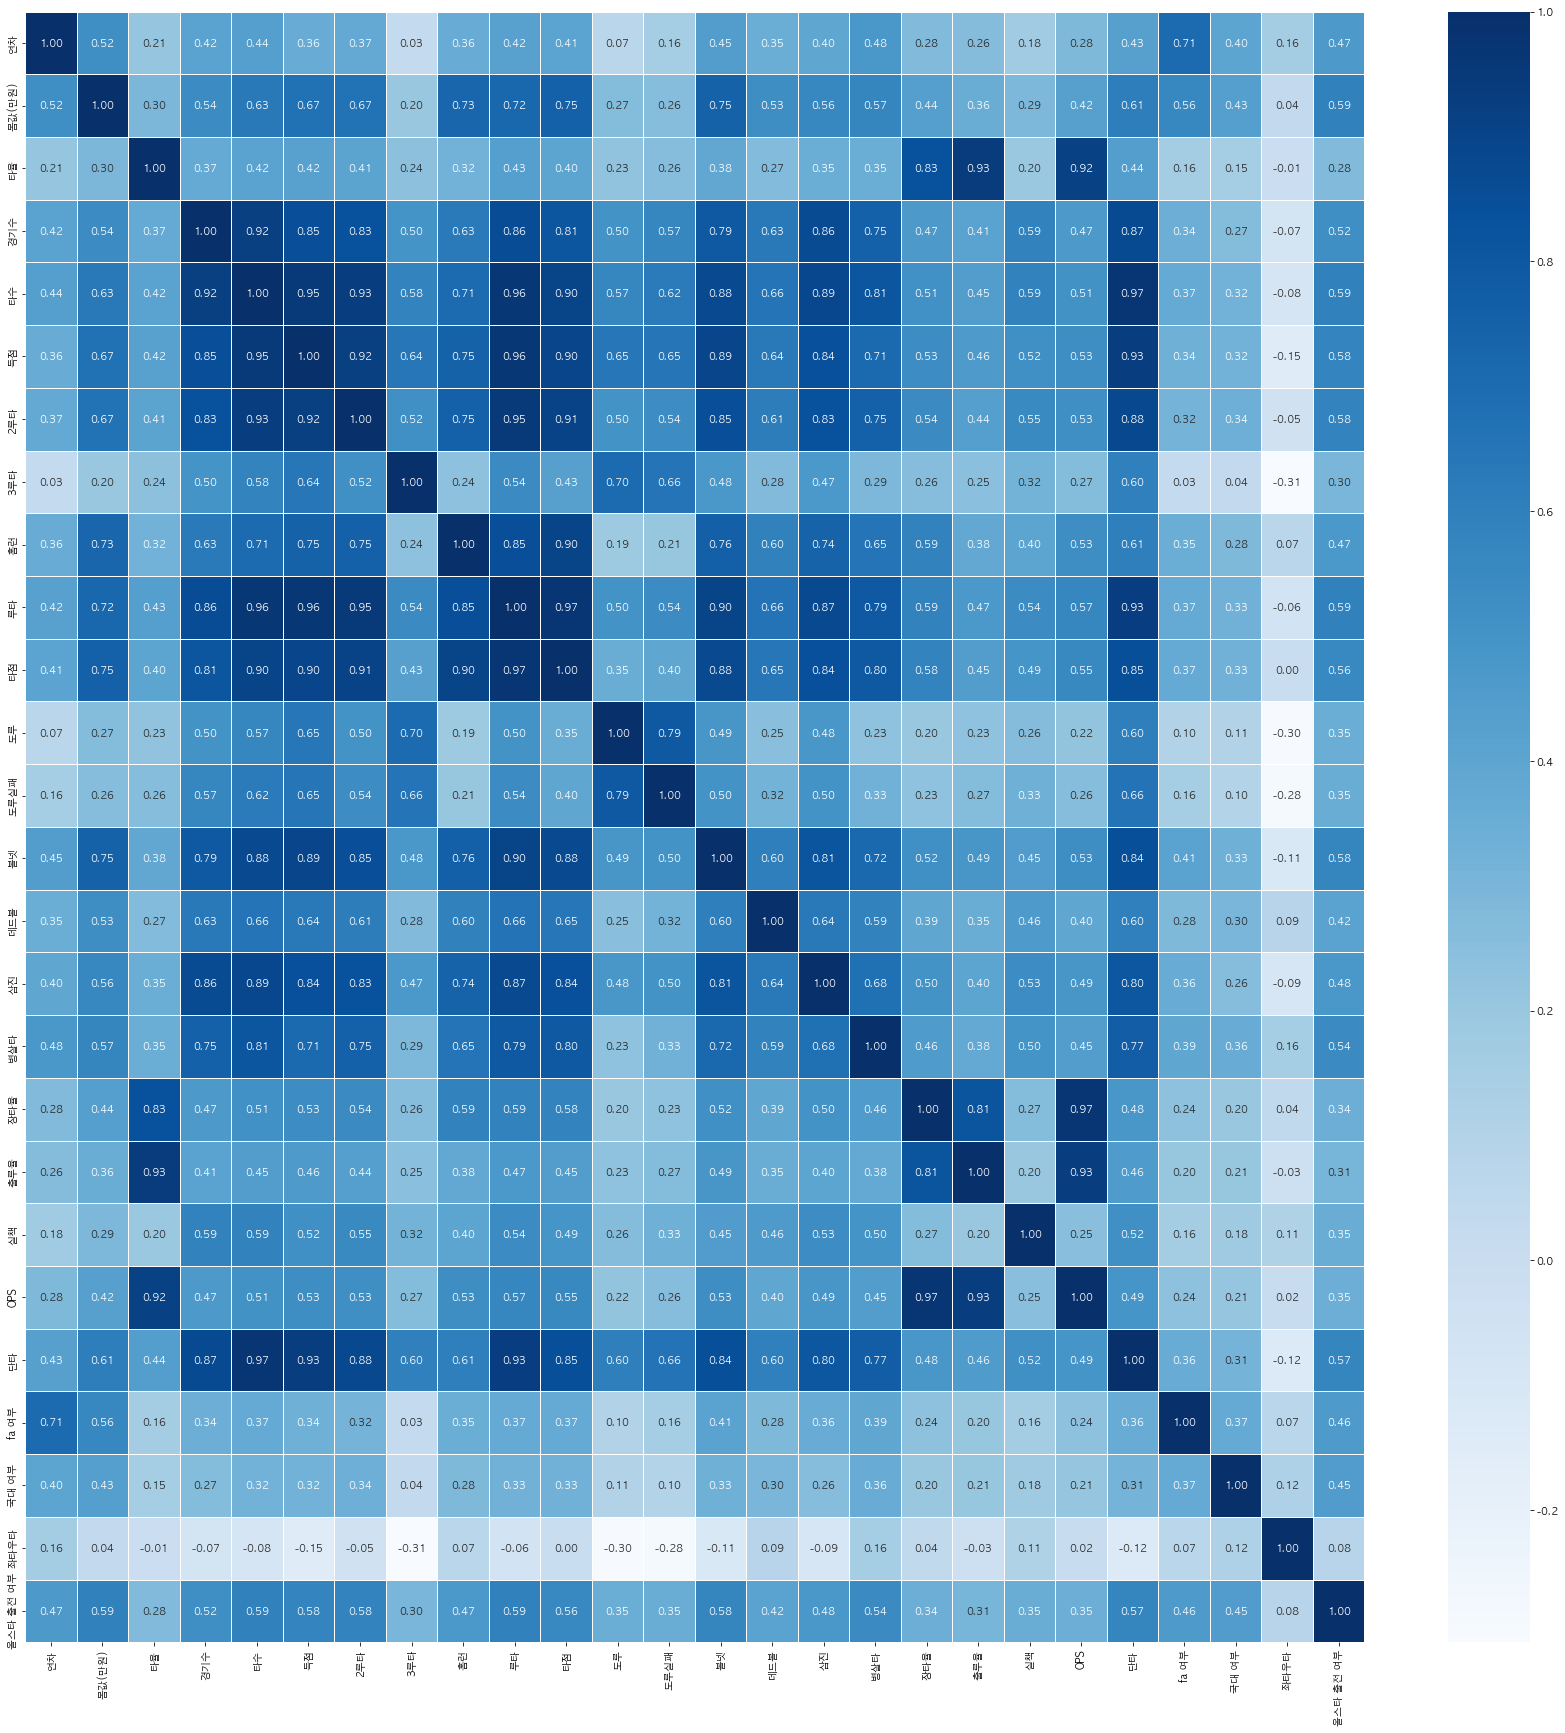

In [362]:
# correlation coefficient heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

타겟변수인 몸값(만원) 과 관련있는 독립변수는 
- 0.7 이상 : 홈런, 루타, 타점, 볼넷
- 0.6 ~ 0.7 : 타수, 득점, 2루타, 단타
- 0.5 ~ 0.6 : 연차, 경기수, 데드볼, 삼진, 병살타, fa여부, 올스타 출전 여부

또한, 기타 독립변수들 간의 상관관계가 매우 높게 나타났고, 특정 독립변수 간 높은 다중공선성이 존재할 것으로 예상할 수 있었다.

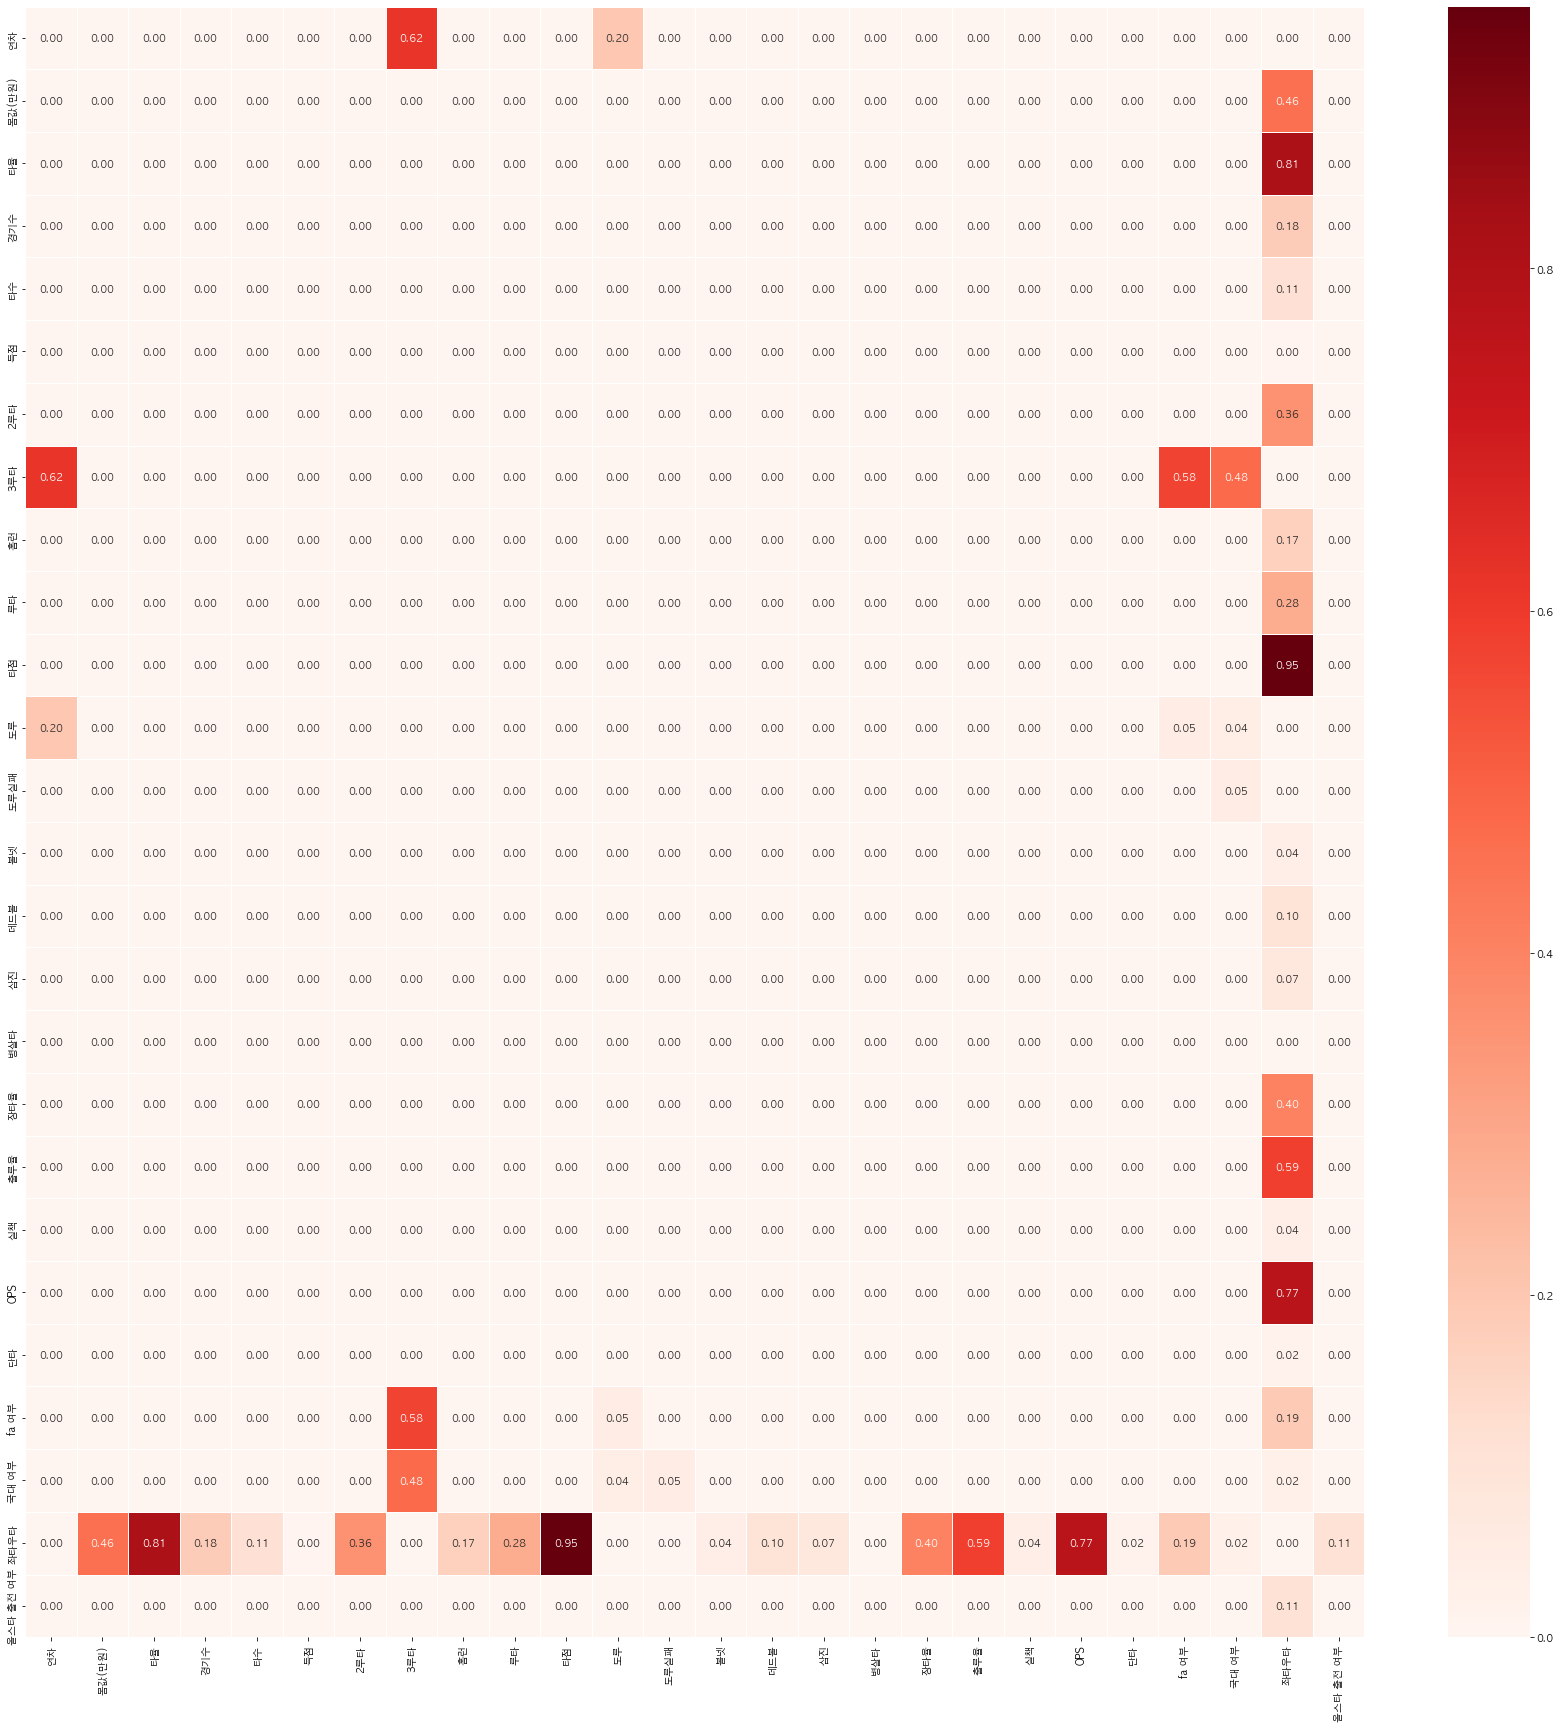

In [363]:
# correlation P-values heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_p_values, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

- 좌타우타 변수는 타겟변수: 몸값(만원) 과 높은 p-value값을 나타내어 독립 변수로써의 활용성이 낮은 것을 알 수 있었다.

# 주성분분석 및 PCA 차원 축소

타자의 경기력 관련 세이버매트릭스 지표인 saber_lst를 생성하여, 이들의 다중공선성을 VIF지수를 통해 확인한다.

In [379]:
saber_lst = ['타율', '경기수', '타수', '득점', '2루타', '3루타', '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책', 'OPS', '단타']

In [380]:
df_saber = scaled_df[saber_lst]
df_saber

,타율,경기수,타수,득점,2루타,3루타,홈런,루타,타점,도루,도루실패,볼넷,데드볼,삼진,병살타,실책,OPS,단타
0,0.257,0.832168,0.517529,0.384615,0.152174,0.307692,0.037736,0.267905,0.184932,0.066667,0.15,0.370370,0.208333,0.360248,0.136364,0.652174,0.3365,0.385057
1,0.158,0.314685,0.166945,0.123077,0.065217,0.153846,0.018868,0.068966,0.047945,0.000000,0.00,0.074074,0.083333,0.186335,0.227273,0.304348,0.2445,0.057471
2,0.200,0.020979,0.006678,0.000000,0.021739,0.000000,0.000000,0.005305,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.3000,0.000000
3,0.000,0.006993,0.003339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.006211,0.000000,0.000000,0.0000,0.000000
4,0.000,0.000000,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.006211,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.083,0.223776,0.018364,0.053846,0.000000,0.000000,0.000000,0.002653,0.013699,0.016667,0.00,0.000000,0.000000,0.031056,0.000000,0.000000,0.0830,0.005747
364,0.290,1.000000,0.889816,0.730769,0.891304,0.153846,0.490566,0.737401,0.664384,0.183333,0.50,0.444444,0.166667,0.757764,0.636364,0.695652,0.4355,0.494253
365,0.335,0.881119,0.829716,0.746154,0.565217,0.384615,0.509434,0.753316,0.773973,0.416667,0.50,0.453704,0.166667,0.409938,0.454545,0.652174,0.4820,0.626437
366,0.000,0.006993,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF 계산을 위해 상수항 열 추가
# cut_1516 = scaled_df_1516[['연차', '연도', '타율', '경기수', '타수', '득점', '안타', '2루타', '3루타', '홈런',
#        '루타', '타점', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '장타율', '출루율', '실책',
#        'OPS']]
cut_1516 = df_saber.drop('루타', axis=1)
df_with_const = add_constant(cut_1516)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# VIF 값 출력
vif_data

,Variable,VIF
0,const,11.185592
1,타율,9.522951
2,경기수,8.983818
3,타수,136.535296
4,득점,30.819571
5,2루타,12.505671
6,3루타,2.890852
7,홈런,16.316063
8,타점,31.064349
9,도루,4.286039


VIF 10 이상인 변수는 타수, 득점, 2루타, 루타, 홈런, 타점, OPS, 단타 

또한 상관분석에서 타 독립변수와 강한 상관관계를 보이는 '경기수' 변수로 인해 나타나는 높은 다중공선성을

pca 차원 축소를 통해 다중공선성을 제거하기로 결정하였다.

In [385]:
saber_selected = ['타율', '3루타', '도루', '도루실패', '데드볼', '삼진', '병살타', '실책', '볼넷']

In [386]:
data = df_saber[['경기수', '타수', '득점', '2루타', '루타', '홈런', '타점', 'OPS', '단타']]
data

,경기수,타수,득점,2루타,루타,홈런,타점,OPS,단타
0,0.832168,0.517529,0.384615,0.152174,0.267905,0.037736,0.184932,0.3365,0.385057
1,0.314685,0.166945,0.123077,0.065217,0.068966,0.018868,0.047945,0.2445,0.057471
2,0.020979,0.006678,0.000000,0.021739,0.005305,0.000000,0.000000,0.3000,0.000000
3,0.006993,0.003339,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
4,0.000000,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...
363,0.223776,0.018364,0.053846,0.000000,0.002653,0.000000,0.013699,0.0830,0.005747
364,1.000000,0.889816,0.730769,0.891304,0.737401,0.490566,0.664384,0.4355,0.494253
365,0.881119,0.829716,0.746154,0.565217,0.753316,0.509434,0.773973,0.4820,0.626437
366,0.006993,0.001669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


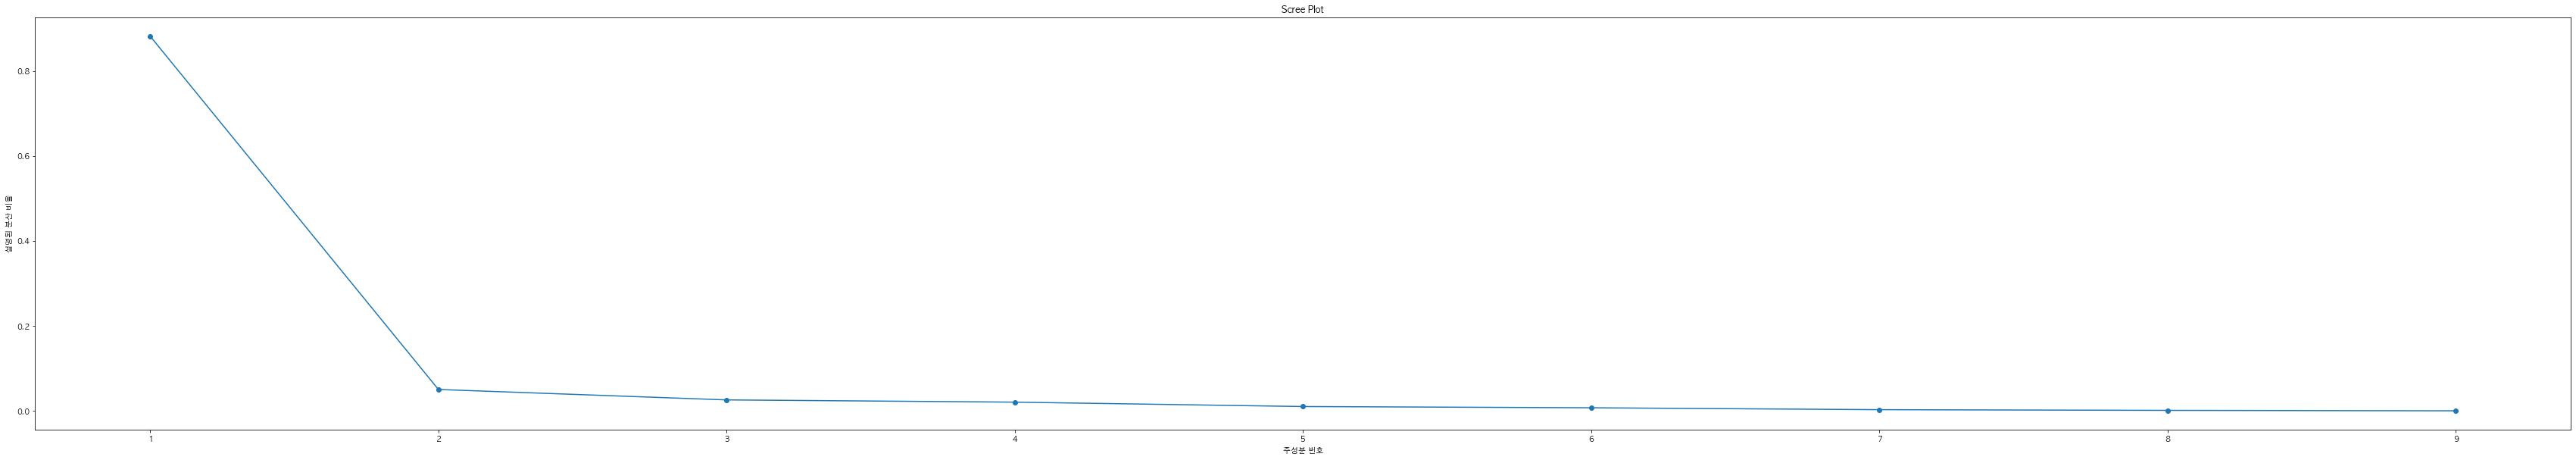

In [387]:
# scree plot

# 데이터의 평균 계산
mean = np.mean(data, axis=0)

# 공분산 행렬 계산
cov_matrix = np.cov(data, rowvar=False)

# 공분산 행렬의 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Scree plot 그리기
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(60, 10))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title("Scree Plot")
plt.xlabel("주성분 번호")
plt.ylabel("설명된 분산 비율")
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.show()

- scree plot을 통해 해당 변수들은 2개의 주성분으로 축소하는 것이 옳다고 판단하였다.

PCA 차원축소를 통해 해당 독립변수들을 2개의 주성분으로 축소하는 과정

In [388]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# PCA를 위한 데이터 전처리

# PCA 모델 초기화
n_components = 2  # 원하는 차원 수
pca = PCA(n_components=n_components)

# PCA 모델 훈련 및 데이터 변환
pca_result = pca.fit_transform(data)

# 결과 데이터프레임 생성
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [389]:
pca_df

,PC1,PC2
0,0.243211,-0.289981
1,-0.495290,-0.016968
2,-0.808247,0.151116
3,-0.856707,0.090378
4,-0.860563,0.094902
...,...,...
363,-0.718258,-0.016935
364,1.294599,0.224399
365,1.205620,0.297651
366,-0.857436,0.090642


In [390]:
# 각 주성분의 고유벡터 가져오기
eigen_vectors = pca.components_

# 주성분의 고유벡터 출력
for i, eigenvector in enumerate(eigen_vectors):
    print(f"PC{i + 1} (Eigenvalue: {pca.explained_variance_ratio_[i]:.2f}) = {eigenvector}")
# 각 차원별로 절댓값 크기 상위 5개와 그 인덱스 추출
abs_values = np.abs(eigen_vectors)  # 배열의 절댓값 계산

# 각 차원별로 상위 5개 인덱스 추출 (절댓값 크기 내림차순)
top_indices = np.argsort(-abs_values, axis=1)[:, :3]  # 각 행에서 상위 5개 인덱스 추출

# 결과 출력
lst_pca1 = list(top_indices[0])
lst_pca2 = list(top_indices[1])

lst1 = []
lst2 = []

for i in lst_pca1:
    lst1.append(data.columns[i])
for i in lst_pca2:
    lst2.append(data.columns[i])
      
print('pca1의 분산에 가장 큰 영향을 준 변수 상위 3개')
print(lst1)
print('pca2에의 분산에 가장 큰 영향을 준 변수 상위 3개')
print(lst2)

PC1 (Eigenvalue: 0.88) = [0.44718556 0.43661702 0.35262877 0.32853986 0.34887749 0.18968586
 0.31940266 0.10584913 0.32586323]
PC2 (Eigenvalue: 0.05) = [-0.60917731 -0.15847563  0.07975198  0.15304398  0.23009358  0.53199608
  0.38843324  0.21746636 -0.19967662]
pca1의 분산에 가장 큰 영향을 준 변수 상위 3개
['경기수', '타수', '득점']
pca2에의 분산에 가장 큰 영향을 준 변수 상위 3개
['경기수', '홈런', '타점']


pca1은 출루에 관련한 지표,

pca2는 장타에 관련한 지표임을 유추해볼 수 있다.

In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF 계산을 위해 상수항 열 추가
x_data3 = df_p[['PC1', 'PC2', 'fa 여부', '국대 여부', '좌타우타', '연차', '볼넷', '올스타 출전 여부', '타율',
       '3루타', '도루', '도루실패', '데드볼', '삼진', '병살타', '실책']]
cut_1516 = x_data3[['PC1', 'PC2', 'fa 여부', '국대 여부', '좌타우타', '연차', '올스타 출전 여부', '타율',
       '3루타', '도루', '도루실패', '데드볼', '삼진', '병살타', '실책']]
# cut_1516 = x_data3
# df_with_const = add_constant(cut_1516)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = cut_1516.columns
vif_data["VIF"] = [variance_inflation_factor(cut_1516.values, i) for i in range(cut_1516.shape[1])]

# VIF 값 출력
vif_data

,Variable,VIF
0,PC1,4.318334
1,PC2,1.326783
2,fa 여부,2.682033
3,국대 여부,2.045987
4,좌타우타,3.462688
5,연차,6.149146
6,올스타 출전 여부,2.970859
7,타율,6.584394
8,3루타,3.121591
9,도루,4.751876


10이상의 vif지수가 나타나지 않는 것으로 보아 다중공선성이 일정 수준 제거되었음을 알 수 있다.

만들어진 두 개의 주성분과 나머지 독립변수, 그리고 종속 변수인 '몸값(만원)' 변수를 추가하여 최종 데이터셋을 만들어준다.

In [447]:
nonsaber_lst = ['fa 여부', '국대 여부', '좌타우타', '연차', '올스타 출전 여부']

In [392]:
df_p = pca_df.copy()
df_p[['fa 여부', '국대 여부', '좌타우타', '연차', '올스타 출전 여부']] = scaled_df[nonsaber_lst]
df_p[['타율', '3루타', '도루', '도루실패','데드볼', '삼진', '병살타', '실책', '볼넷']] = scaled_df[saber_selected]
df_p[['몸값(만원)']] = scaled_df[['몸값(만원)']]
df_p

,PC1,PC2,fa 여부,국대 여부,좌타우타,연차,올스타 출전 여부,타율,3루타,도루,도루실패,데드볼,삼진,병살타,실책,볼넷,몸값(만원)
0,0.243211,-0.289981,0,0,0,0.111111,0,0.257,0.307692,0.066667,0.15,0.208333,0.360248,0.136364,0.652174,0.370370,0.026015
1,-0.495290,-0.016968,0,0,0,0.166667,0,0.158,0.153846,0.000000,0.00,0.083333,0.186335,0.227273,0.304348,0.074074,0.024112
2,-0.808247,0.151116,0,0,0,0.055556,0,0.200,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001904
3,-0.856707,0.090378,0,0,0,0.111111,0,0.000,0.000000,0.000000,0.00,0.000000,0.006211,0.000000,0.000000,0.000000,0.001904
4,-0.860563,0.094902,0,1,1,0.055556,0,0.000,0.000000,0.000000,0.00,0.000000,0.006211,0.000000,0.000000,0.000000,0.001904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,-0.718258,-0.016935,0,0,1,0.055556,0,0.083,0.000000,0.016667,0.00,0.000000,0.031056,0.000000,0.000000,0.000000,0.003807
364,1.294599,0.224399,1,1,1,0.444444,1,0.290,0.153846,0.183333,0.50,0.166667,0.757764,0.636364,0.695652,0.444444,0.302030
365,1.205620,0.297651,1,1,1,0.500000,1,0.335,0.384615,0.416667,0.50,0.166667,0.409938,0.454545,0.652174,0.453704,0.746193
366,-0.857436,0.090642,0,0,0,0.166667,0,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.002538


# 다중회귀분석

In [394]:
import statsmodels.api as sm
# crim, rm, lstat을 통한 다중 선형회귀분석
x_data3 = df_p[['PC1', 'PC2', 'fa 여부', '국대 여부', '좌타우타', '연차', '볼넷', '올스타 출전 여부', '타율',
       '3루타', '도루', '도루실패', '데드볼', '삼진', '병살타', '실책']] #변수 여러개
target3 = df_p[["몸값(만원)"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data3, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target3, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 몸값(만원)   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     69.12
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           5.77e-98
Time:                        22:28:38   Log-Likelihood:                 389.22
No. Observations:                 368   AIC:                            -744.4
Df Residuals:                     351   BIC:                            -678.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      0.028      4.070      0.000       0.058       0.167
PC1            0.1446      0.027      5.268      0.000       0.091       0.199
PC2            0.2663      0.033      8.034      0.000       0.201       0.332
fa 여부          0.0947      0.016      5.758      0.000       0.062       0.127
국대 여부          0.0215      0.011      1.896      0.059      -0.001       0.044
좌타우타          -0.0015      0.011     -0.141      0.888      -0.023       0.020
연차             0.0425      0.029      1.482      0.139      -0.014       0.099
볼넷             0.2843      0.051      5.625      0.000       0.185       0.384
올스타 출전 여부      0.0374      0.013      2.773      0.006       0.011       0.064
타율            -0.1059      0.050     -2.119      0.035      -0.204      -0.008
3루타           -0.1801      0.051     -3.522      0.000      -0.281      -0.080
도루             0.1250      0.060      2.095      0.037       0.008       0.242
도루실패          -0.0772      0.051     -1.507      0.133      -0.178       0.024
데드볼            0.0978      0.035      2.800      0.005       0.029       0.167
삼진            -0.2386      0.050     -4.816      0.000      -0.336      -0.141
병살타           -0.0958      0.039     -2.429      0.016      -0.173      -0.018
실책            -0.0276      0.029     -0.955      0.340      -0.084       0.029
==============================================================================
Omnibus:                      124.246   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.908
Skew:                           1.229   Prob(JB):                    1.26e-189
Kurtosis:                      10.120   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다중종속 변수 '몸값(만원)'은 해당 모형의 독립변수들로 의해 0.759만큼의 설명력을 가지는 것으로 나타났다.

각각의 독립변수들의 유의성을 살펴보면, 타자의 출루 관련 경기력을 나타내는 PC1, 장타 관련 경기력을 나타내는 PC2, fa 여부, 볼넷, 3루타, 삼진의 유의 확률은 0.001보다 작게 나타나 몸값과 매우 유의한 관계를 보였다.

또한 올스타 출전 여부, 타율, 도루, 데드볼, 병살타는 0.05 유의수준에서 몸값과 유의한 관계가 있는 것으로 나타났다.

하지만 국대 여부, 좌타우타, 연차, 실책은 통계적으로 몸값과 유의한 영향을 미치지 않는 것으로 나타났다.

# Clustering

- 군집화를 진행하기 위해 필요한 라이브러리를 임포트해준다.

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import io

In [425]:
df_c = df_p.iloc[:, :16]
df_c

,PC1,PC2,fa 여부,국대 여부,좌타우타,연차,올스타 출전 여부,타율,3루타,도루,도루실패,데드볼,삼진,병살타,실책,볼넷
0,0.243211,-0.289981,0,0,0,0.111111,0,0.257,0.307692,0.066667,0.15,0.208333,0.360248,0.136364,0.652174,0.370370
1,-0.495290,-0.016968,0,0,0,0.166667,0,0.158,0.153846,0.000000,0.00,0.083333,0.186335,0.227273,0.304348,0.074074
2,-0.808247,0.151116,0,0,0,0.055556,0,0.200,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.856707,0.090378,0,0,0,0.111111,0,0.000,0.000000,0.000000,0.00,0.000000,0.006211,0.000000,0.000000,0.000000
4,-0.860563,0.094902,0,1,1,0.055556,0,0.000,0.000000,0.000000,0.00,0.000000,0.006211,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,-0.718258,-0.016935,0,0,1,0.055556,0,0.083,0.000000,0.016667,0.00,0.000000,0.031056,0.000000,0.000000,0.000000
364,1.294599,0.224399,1,1,1,0.444444,1,0.290,0.153846,0.183333,0.50,0.166667,0.757764,0.636364,0.695652,0.444444
365,1.205620,0.297651,1,1,1,0.500000,1,0.335,0.384615,0.416667,0.50,0.166667,0.409938,0.454545,0.652174,0.453704
366,-0.857436,0.090642,0,0,0,0.166667,0,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


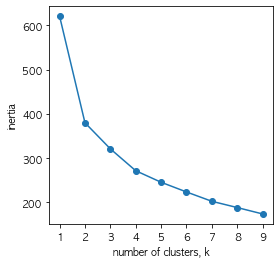

In [426]:
# # 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_c)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [427]:
kmeansModel = KMeans(n_clusters=4)
kmeansModel.fit(df_c)

KMeans(n_clusters=4)

In [428]:
pca_corr = PCA()
pca_corr.fit(df_c)

PCA()

In [429]:
pca_corr_ = pca_corr.fit_transform(df_c)[:,0:2]
name=list(df['이름'])

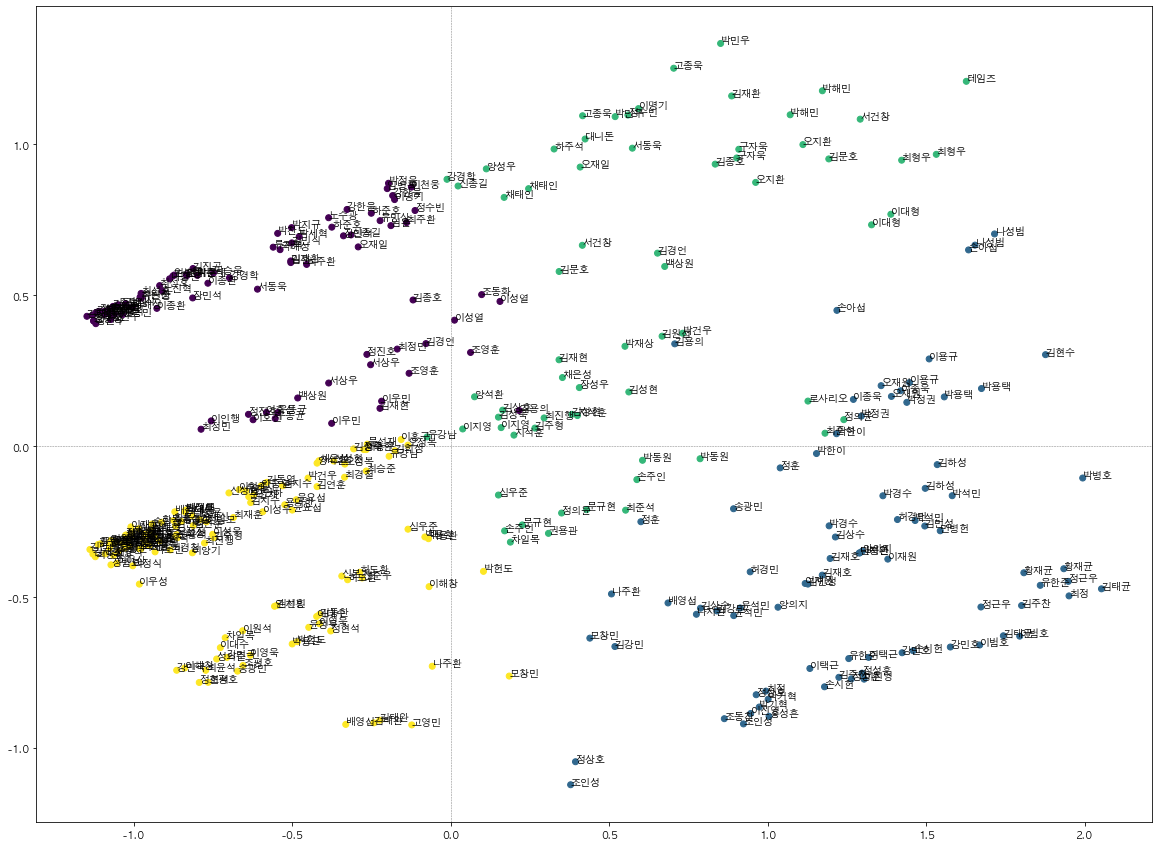

In [431]:
plt.figure(figsize=(20, 15))
plt.scatter(pca_corr_[:,0],pca_corr_[:,1], c = kmeansModel.labels_)
for i, txt in enumerate(name):
    plt.annotate(txt, (pca_corr_[i,0], pca_corr_[i,1]))
plt.axhline(y=0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

In [432]:
result = pd.concat([df, pd.DataFrame(kmeansModel.labels_, columns=['Cluster'])], axis=1)
Profiles = result.groupby('Cluster').mean()

In [433]:
result

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,장타율,출루율,실책,OPS,단타,fa 여부,국대 여부,좌타우타,올스타 출전 여부,Cluster
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,0.325,0.348,15,0.673,67,0,0,0,0,2
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,0.257,0.232,7,0.489,10,0,0,0,0,0
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0.400,0.200,0,0.600,0,0,0,0,0,0
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0.000,0.000,0,0.000,0,0,0,0,0,0
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,0.000,0.000,0,0.000,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0.083,0.083,0,0.166,1,0,0,1,0,3
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,0.521,0.350,16,0.871,86,1,1,1,1,1
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,0.570,0.394,15,0.964,109,1,1,1,1,1
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0.000,0.000,0,0.000,0,0,0,0,0,0


In [434]:
Profiles

,연차,연도,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,...,병살타,장타율,출루율,실책,OPS,단타,fa 여부,국대 여부,좌타우타,올스타 출전 여부
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.264368,2015.517241,6550.574713,0.222897,54.367816,103.655172,17.114943,4.011494,0.609195,1.781609,...,1.528736,0.299250,0.292293,1.712644,0.591544,20.287356,0.057471,0.195402,0.000000,0.034483
1,11.012048,2015.493976,52307.228916,0.298542,121.325301,409.469880,68.192771,22.421687,1.518072,14.542169,...,10.518072,0.462260,0.378462,7.144578,0.840722,85.722892,0.650602,0.939759,0.783133,0.915663
2,7.227273,2015.515152,23825.757576,0.293682,124.121212,401.530303,62.924242,20.333333,2.636364,10.924242,...,8.727273,0.435328,0.363723,6.909091,0.799050,86.090909,0.151515,0.015152,0.439394,0.439394
3,5.015152,2015.537879,6206.818182,0.225439,41.416667,70.727273,9.386364,3.166667,0.196970,1.712121,...,1.803030,0.317454,0.289054,1.651515,0.606508,12.106061,0.045455,0.174242,1.000000,0.106061
